<a href="https://colab.research.google.com/github/amitjha11/Fake-Tweet-Detection-using-LSTM/blob/main/Real_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
! pip install -q kaggle


In [101]:
!mkdir -p ~/.kaggle

In [102]:
!cp kaggle.json ~/.kaggle

In [103]:
!kaggle competitions download -c 'nlp-getting-started'

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [104]:
import pandas as pd
import numpy as np

In [105]:
train=pd.read_csv('/content/train.csv')

In [106]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [107]:
test=pd.read_csv('/content/test.csv')

In [108]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [109]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [110]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


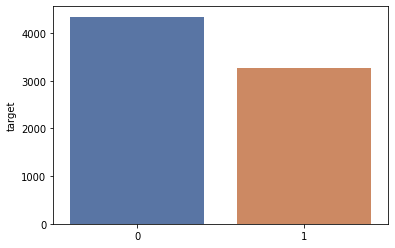

In [113]:
sns.barplot(train['target'].value_counts().index,train['target'].value_counts(),palette='deep')

In [114]:
#Disaster Tweet
disaster=train[train['target']==1]['text']
for i in range(5):
  print(disaster[i])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


In [115]:
#Not a Disaster Tweet
not_disaster=train[train['target']==0]['text']
print(not_disaster.head())
print(not_disaster.tail())



15                  What's up man?
16                   I love fruits
17                Summer is lovely
18               My car is so fast
19    What a goooooooaaaaaal!!!!!!
Name: text, dtype: object
7581    @engineshed Great atmosphere at the British Li...
7582    Cramer: Iger's 3 words that wrecked Disney's s...
7584    These boxes are ready to explode! Exploding Ki...
7587                                   Sirens everywhere!
7593    I just heard a really loud bang and everyone i...
Name: text, dtype: object


In [116]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [117]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('http\S+|www.\S+', '',text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and training datasets
train['text'] = train['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))

# Let's take a look at the updated text
train['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

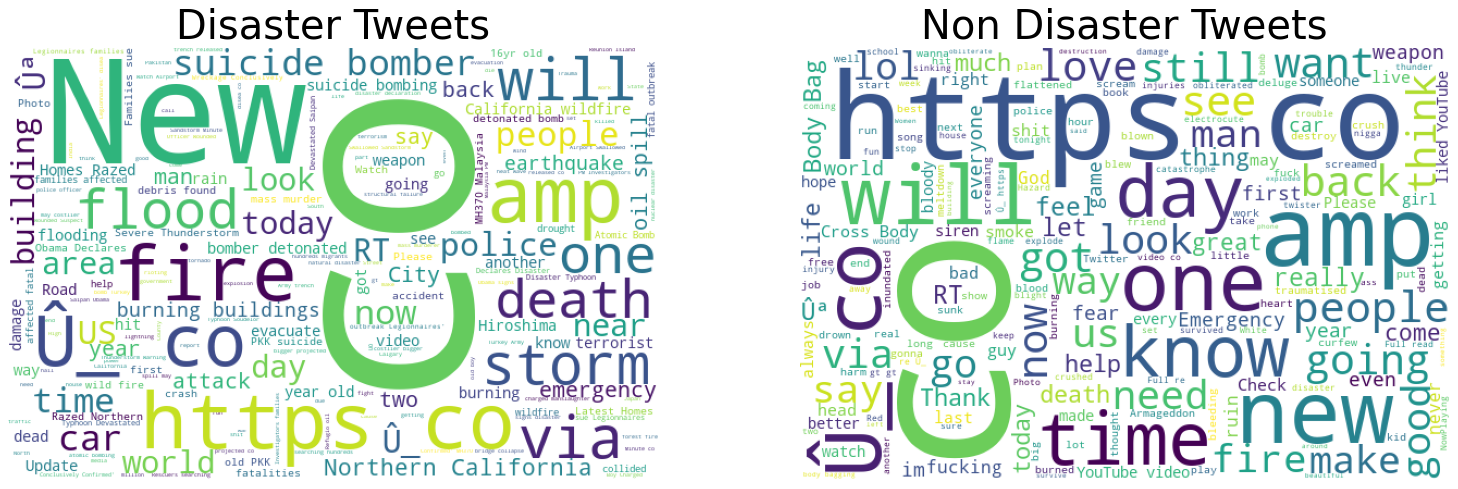

In [118]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(not_disaster))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [119]:
# Tokenization

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x))
test['text'] = test['text'].apply(lambda x: tokenizer.tokenize(x))
train['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [120]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words


train['text'] = train['text'].apply(lambda x : remove_stopwords(x))
test['text'] = test['text'].apply(lambda x : remove_stopwords(x))
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [122]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

train['text'] = train['text'].apply(lambda x : combine_text(x))
test['text'] = test['text'].apply(lambda x : combine_text(x))
train['text']
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [123]:
X=train['text']

In [124]:
from tensorflow.keras.preprocessing.text import one_hot

In [125]:
vocab_size=10000

In [126]:
onehot_repr=[one_hot(words,vocab_size)for words in X] 

In [127]:
onehot_repr[5]

[5000, 368, 7455, 3537, 4080, 3317, 9723, 8672, 5293, 6912, 5055, 380]

In [128]:
xx=[]
for i in range(len(onehot_repr)):
  xx.append(len(onehot_repr[i]))
print(max(xx))

23


In [129]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [130]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)


[[   0    0    0 ... 9458 7488 3113]
 [   0    0    0 ... 8868  308 5317]
 [   0    0    0 ...  187  673 2960]
 ...
 [   0    0    0 ...    0 4435 2739]
 [   0    0    0 ... 2705 3219 8237]
 [   0    0    0 ...  406 1599 3880]]


In [131]:
model=Sequential()
model.add(Embedding(vocab_size,32,input_length=sent_length))

In [132]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 32)            320000    
Total params: 320,000
Trainable params: 320,000
Non-trainable params: 0
_________________________________________________________________


In [133]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM,Dense

In [134]:
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 32)            320000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________


In [136]:
y=train['target']

In [137]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [139]:
X_final.shape

(7613, 30)

In [142]:
y_final.shape

(7613,)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.3,random_state=2)

In [145]:
X_train.shape

(5329, 30)

In [146]:
y_train.shape

(5329,)

In [147]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
167/167 [==============================] - 3s 18ms/step - loss: 0.6009 - accuracy: 0.6709 - val_loss: 0.5027 - val_accuracy: 0.7601
Epoch 2/20
167/167 [==============================] - 2s 15ms/step - loss: 0.3631 - accuracy: 0.8459 - val_loss: 0.5100 - val_accuracy: 0.7723
Epoch 3/20
167/167 [==============================] - 3s 15ms/step - loss: 0.2580 - accuracy: 0.8994 - val_loss: 0.5399 - val_accuracy: 0.7649
Epoch 4/20
167/167 [==============================] - 3s 15ms/step - loss: 0.1895 - accuracy: 0.9323 - val_loss: 0.6730 - val_accuracy: 0.7623
Epoch 5/20
167/167 [==============================] - 3s 15ms/step - loss: 0.1431 - accuracy: 0.9486 - val_loss: 0.8284 - val_accuracy: 0.7570
Epoch 6/20
167/167 [==============================] - 3s 15ms/step - loss: 0.1228 - accuracy: 0.9604 - val_loss: 0.9348 - val_accuracy: 0.7447
Epoch 7/20
167/167 [==============================] - 3s 15ms/step - loss: 0.0966 - accuracy: 0.9666 - val_loss: 0.9752 - val_accuracy: 0.7474

In [160]:
y_pred=model.predict_classes(X_test)

In [161]:
y_pred

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [162]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [163]:
accuracy_score(y_test,y_pred)

0.7338003502626971

In [164]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.79      0.77      1308\n           1       0.70      0.66      0.68       976\n\n    accuracy                           0.73      2284\n   macro avg       0.73      0.72      0.73      2284\nweighted avg       0.73      0.73      0.73      2284\n'

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rand_forst=RandomForestClassifier(n_estimators=1000)

In [167]:
rand_forst.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
pred=rand_forst.predict(X_test)

In [169]:
accuracy_score(y_test,pred)

0.6151488616462347